# Regresion Lineal simple en Python

## El paquete statsmodel para regresion lineal

In [92]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [93]:
data = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/ads/Advertising1.csv")

In [94]:
data.head()

,Google_Ads,Facebook_Ads,Instagram_Ads,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [95]:
#Prediccion de ventas (Sales) en función de Google Ads (Google_Ads)
lm = smf.ols(formula="Sales~Google_Ads", data = data).fit()
lm

In [96]:
lm.params

Intercept     7.032594
Google_Ads    0.047537
dtype: float64

El modelo lineal predictivo sería Sales  (Ventas) = 7.032594 + 0.047537 por cada € gastado en televisión

In [97]:
lm.pvalues

Intercept     1.406300e-35
Google_Ads    1.467390e-42
dtype: float64

In [98]:
lm.rsquared_adj

0.6099148238341623

In [99]:
lm.rsquared

0.611875050850071

In [100]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           1.47e-42
Time:                        02:13:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
Google_Ads     0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
sales_pred = lm.predict(pd.DataFrame(data["Google_Ads"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

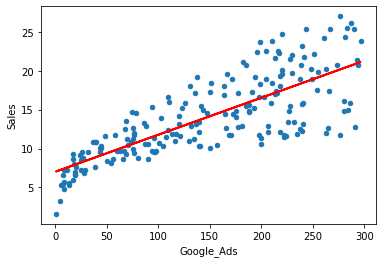

In [102]:
data.plot(kind = "scatter", x = "Google_Ads", y = "Sales")
plt.plot(pd.DataFrame(data["Google_Ads"]), sales_pred, c="red", linewidth = 2)

In [103]:
data["sales_pred"] = 7.032594 + 0.047537*data["Google_Ads"]

In [104]:
data["RSE"] = (data["Sales"] - data["sales_pred"])**2

In [105]:
SSD = sum(data["RSE"])

In [106]:
RSE = np.sqrt((SSD/(len(data)-2)))
RSE

3.258656369238098

In [107]:
sales_m = np.mean(data["Sales"])
sales_m

14.022500000000003

In [108]:
error = RSE/sales_m
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

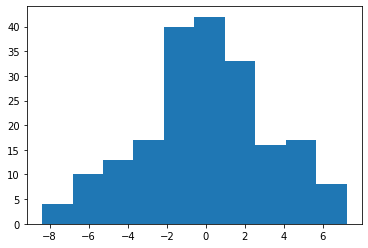

In [109]:
plt.hist(data["Sales"]-data["sales_pred"])

# Regresión lineal múltimple en Python

## El paquete statsmodel para regresión múltiple

+ Ventas a partir de la Google_Ads (Sales~Google_Ads)
+ Ventas en función del Facebook_Ads (Sales~Facebook_Ads)
+ Ventas en función de la Instagram_Ads (Sales~Instagram_Ads)
+ Ventas en función de la Google_Ads más Facebook_Ads (Sales~Google_Ads + Facebook_Ads)
+ Ventas para Google_Ads + Instagram_Ads (Sales~Google_Ads + Instagram_Ads)
+ Ventas de Facebook_Ads más radio (Sales~Instagram_Ads + Facebook_Ads)
+ Ventas de Google_Ads + Facebook_Ads + Instagram_Ads (Sales~Google_Ads + Facebook_Ads + Instagram_Ads)

In [110]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~Google_Ads+Facebook_Ads", data = data).fit()

In [111]:
lm2.params

Intercept       2.921100
Google_Ads      0.045755
Facebook_Ads    0.187994
dtype: float64

In [112]:
lm2.pvalues

Intercept       4.565557e-19
Google_Ads      5.436980e-82
Facebook_Ads    9.776972e-59
dtype: float64

Sales = 5.774948 +  0.046901 (TV) + 0.044219 (Facebook_Ads)

In [113]:
lm2.rsquared

0.8971942610828957

In [114]:
lm2.rsquared_adj

0.8961505479974429

In [115]:
sales_pred = lm2.predict(data[["Google_Ads", "Facebook_Ads"]])

In [116]:
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
5      12.512084
6      11.718212
7      12.105516
8       3.709379
9      12.551697
10      7.035860
11     17.256520
12     10.608662
13      8.810951
14     18.444668
15     20.828915
16     12.903865
17     23.241076
18      9.941215
19     14.153846
20     18.121392
21     14.742064
22      6.514172
23     16.544027
24      8.140352
25     15.608021
26     14.967694
27     17.046335
28     19.399541
29      9.159297
         ...    
170     7.389574
171    14.376846
172     7.596578
173    11.960970
174    13.736151
175    24.783526
176    19.964022
177    12.174924
178    16.013844
179    12.378040
180    10.575089
181    13.933696
182     6.564088
183    24.163936
184    18.537949
185    20.779377
186     9.698684
187    17.060279
188    18.620097
189     6.051445
190    12.454978
191     8.405926
192     4.478859
193    18.448761
194    16.463190
195     5.364512
196     8.152375
197    12.7680

In [117]:
SSD = sum((data["Sales"] - sales_pred)**2)
SSD

556.9139800676186

In [118]:
#Numero de varables predictoras 2 - 1, es por eso que restamos -2 -1
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

1.6813609125080013

In [119]:
error = RSE / sales_m
error

0.11990450436855062

In [129]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           4.83e-98
Time:                        02:24:29   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9211      0.294      9.919      0.000       2.340       3.502
Google_Ads       0.0458      0.001     32.909      0.000       0.043       0.048
Facebook_Ads     0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
#Añadir el Instagram_Ads al modelo existente
lm3 = smf.ols(formula="Sales~Google_Ads+Instagram_Ads", data = data).fit()

In [131]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           3.95e-45
Time:                        02:24:36   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.7749      0.525     10.993      0.000       4.739       6.811
Google_Ads        0.0469      0.003     18.173      0.000       0.042       0.052
Instagram_Ads     0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
sales_pred = lm3.predict(data[["Google_Ads", "Instagram_Ads"]])
SSD = sum((data["Sales"] - sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [133]:
RSE

3.120719860252885

In [134]:
RSE/sales_m

0.22255089037282116

In [135]:
#Numero de varables predictoras 2 - 1, es por eso que restamos -2 -1
RSE = np.sqrt(SSD/(len(data)-2-1))
RSE

3.120719860252885

In [136]:
#Añadir la radio al modelo existente
lm4 = smf.ols(formula="Sales~Google_Ads+Instagram_Ads+Facebook_Ads", data = data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        02:24:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9389      0.312      9.422      0.000       2.324       3.554
Google_Ads        0.0458      0.001     32.809      0.000       0.043       0.049
Instagram_Ads    -0.0010      0.006     -0.177      0.860      -0.013       0.011
Facebook_Ads      0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multicolinealidad

## Factor Inflacción de la Varianza

 + VIF = 1: Las vaariables no están correlacionadas.
 + VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo.
 + VIF > 5 : Las variables están altamante correlacionadas y deben desaparecer del modelo.

In [89]:
#Facebook_Ads ~ Google_Ads + Instagram_Ads Vamos a ver Newspaper en realación a televisión más rádio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Facebook_Ads~Google_Ads+Instagram_Ads", data=data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1449519171055351

In [90]:
#Google_Ads ~ Facebook_Ads + Instagram_Ads Vamos a ver Newspaper en realación a televisión más rádio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="Google_Ads~Facebook_Ads+Instagram_Ads", data = data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [91]:
#Instagram_Ads ~ Google_Ads + Facebook_Ads Vamos a ver Newspaper en realación a televisión más rádio -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Instagram_Ads~Facebook_Ads", data = data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1433660600600446